Residual plot saved as 'residual_plot.png'


100%|===================| 623/626 [03:49<00:01]        

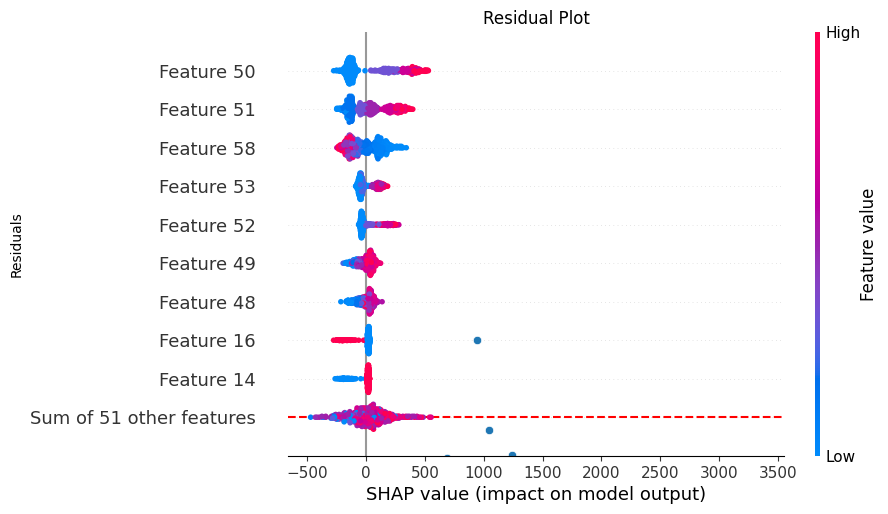

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from otherpy import predict_price, load_model, load_data, clean_data, get_top_amenities, get_lat_long_from_address, normalize_amenity, get_dynamic_title_tips, fit_model,parse_clean_and_normalize,TopKMultiLabelBinarizer,clip_outliers
from sklearn.model_selection import train_test_split
import shap
import pandas as pd
if __name__ =="__main__":
    df = load_data()
    df_clean = clean_data(df)
    model = load_model()
    X = df_clean.drop(columns=["price"])
    y = df_clean["price"]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    y_pred = model.predict(x_test)
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.savefig("residual_plot.png", dpi=300)
    print("Residual plot saved as 'residual_plot.png'")


# Prepare SHAP explainer
x_test_transformed = model.named_steps['preprocessing'].transform(x_test)
if hasattr(x_test_transformed, "toarray"):
    x_test_transformed = x_test_transformed.toarray()
explainer = shap.Explainer(model.named_steps['regressor'], x_test_transformed)
shap_values = explainer(x_test_transformed,check_additivity=False)

# Summary plot (global)
shap.plots.beeswarm(shap_values)

# Force plot (local for individual prediction)
shap.plots.force(shap_values[0])

